This is practice and can be ignored.

In [1]:
# Taken from https://www.geeksforgeeks.org/machine-learning/implementing-pca-in-python-with-scikit-learn/
# and https://www.statology.org/scree-plot-python/
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [15]:
df = pd.read_csv('../X_train_census.csv')
df.head()

,age,type_employer,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,hr_worked_per_week
0,60,Private,183738,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,45
1,21,Private,151158,10,Never-married,Prof-specialty,Own-child,White,Female,25
2,49,Private,174840,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,46
3,36,Private,202685,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,47
4,47,Self-emp-inc,79627,15,Divorced,Prof-specialty,Not-in-family,White,Male,50


In [18]:
import numpy as np
import scipy
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline



ohe = OneHotEncoder()
df = ohe.fit_transform(df).toarray()

scale = StandardScaler(with_mean=False)
df = scale.fit_transform(df)

pca = PCA(n_components = 10)
df = pca.fit_transform(df)

df

MemoryError: Unable to allocate 24.3 GiB for an array with shape (59603, 54816) and data type float64

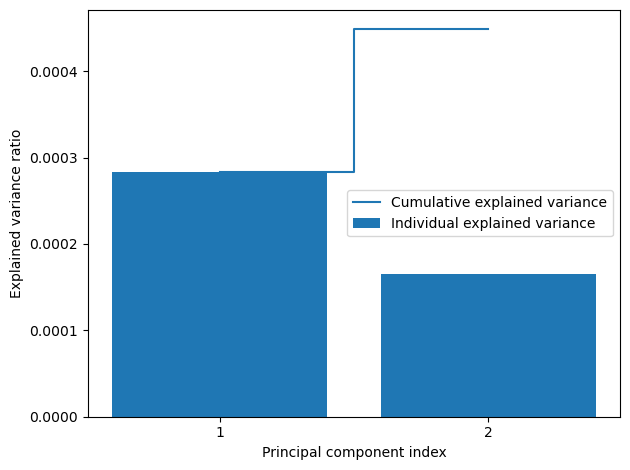

In [17]:
import matplotlib.pyplot as plt
# bar graph of explained variance of each principle component
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, align='center',
        label='Individual explained variance')

# line graph of cumulative explained variance -- as we add on PCs, how much more variance do we explain?
plt.step(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid',
         label='Cumulative explained variance')

# make graph pretty
plt.xticks(range(1, len(pca.explained_variance_ratio_)+1))
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='right')
plt.tight_layout()
plt.show()


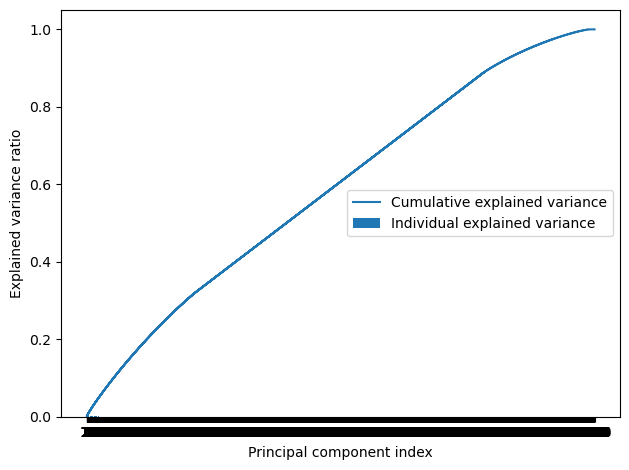

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# bar graph of explained variance of each principle component
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, align='center',
        label='Individual explained variance')

# line graph of cumulative explained variance -- as we add on PCs, how much more variance do we explain?
plt.step(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid',
         label='Cumulative explained variance')

# make graph pretty
plt.xticks(range(1, len(pca.explained_variance_ratio_)+1))
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='right')
plt.tight_layout()
plt.show()


In [8]:
print("Explained variance:", pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

Explained variance: [1.22765079e-03 1.14266291e-03 9.14686817e-04 ... 2.74348688e-35
 2.12658578e-35 1.73307751e-35]
[0.00122765 0.00237031 0.003285   ... 1.         1.         1.        ]


In [ ]:
df_x = pd.DataFrame(X_pca)
df_y = pd.DataFrame(y)
df_x.to_csv("pca_feat_eng_x.csv")
df_y.to_csv("pca_feat_eng_y.csv")